
___


**Task**: `Customer Segmentation`

**Date**: `2023-11-07`

**Main**: `Clustering (Unsupervised ML)`

**Programming Language**: `Python`

___






### Customer Segmentation

Customer segmentation is the process of dividing a company's customers into groups based on common characteristics so companies can market to each group effectively and appropriately. Customer segmentation helps a company to:

1. Modify products according to distinct needs and behaviours of the customers. 
2. Cater to the concerns of different types of customers.

In this notebook we will be performing an unsupervised clustering of data on the customer's records from a groceries firm's database.


### Imports

In the following code cell we are going to import all the packages that we are going to use in this notebook.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from matplotlib import colors
from datetime import datetime, date
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics

import sys, warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
print("pandas:", pd.__version__)
print("numpy:", np.__version__)

pandas: 2.1.1
numpy: 1.24.3


### Seed

In the following code cell we are going to set the seed for random operations for reproducivity.

In [2]:
SEED = 42
np.random.seed(SEED)

### Loading Data

In the following code cell we are going to load the `data/marketing_campaign.csv` into a dataframe. This file has values seperated using `\t` as a delimeter.

In [3]:
dataframe = pd.read_csv('data/marketing_campaign.csv', sep='\t')
dataframe.tail().reset_index(drop=True)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
1,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
3,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
4,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


### About the dataset

The dataset contains `29` columns and these columns can be categorised into the following categories.

1. People

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

2. Products

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

3. Promotion

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

4. Place

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month


### Data Cleaning

Inorder to get more information about the data let's check the information of it.

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Let's check if we have `null` values in the dataframe.

In [5]:
dataframe.isnull().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

We can see that there are null values in the `Income` column. How about `na` values? 

In [6]:
dataframe.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

We can see that our Income column has some missing data let's go ahead and drop those `na` values using the `dropna()` function

In [7]:
dataframe.dropna(inplace=True)

Next step, we going to modify `"Dt_Customer"` and create a column called `"Customer_For"` that indicates the number of days a customer is registered in the firm's database. 

So we are going to get the minimum and the maximum date in the records.

In [8]:
dataframe.Dt_Customer = pd.to_datetime(dataframe.Dt_Customer, errors='ignore', dayfirst=True)

In [9]:
dates = []
for d in dataframe.Dt_Customer:
    dates.append(d.date())
    
print(f"Old Customer Enrollment: {min(dates)}")
print(f"New Customer Enrollment: {max(dates)}")

Old Customer Enrollment: 2012-07-30
New Customer Enrollment: 2014-06-29


The  `"Customer_For"`  column record the number of days the customers started to shop in the store relative to the last recorded date.

In [10]:
days = []
lst = max(dates)
for dt in dates:
    days.append(abs(dt - lst).days)

In [11]:
dataframe["Customer_For"] = days

Next we are going to explore the unique categorical features in our dataframe.

In [12]:
for index,value in enumerate(dataframe.Education.unique()):
    print(f"{index+1}. {value}")
    
print('\nCOUNTS -----------------')
dataframe.Education.value_counts()

1. Graduation
2. PhD
3. Master
4. Basic
5. 2n Cycle

COUNTS -----------------


Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [13]:
for index,value in enumerate(dataframe.Marital_Status.unique()):
    print(f"{index+1}. {value}")
    
    
    
print('\nCOUNTS -----------------')
dataframe.Marital_Status.value_counts()

1. Single
2. Together
3. Married
4. Divorced
5. Widow
6. Alone
7. Absurd
8. YOLO

COUNTS -----------------


Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

### Feature Engineering

In the following engineering steps we are going to do the following:

1. Extract the `"Age"` of a customer by the `"Year_Birth"` indicating the birth year of the respective person.
2. Create another feature `"Spent"` indicating the total amount spent by the customer in various categories over the span of two years.
3. Create another feature `"Living_With"` out of `"Marital_Status"` to extract the living situation of couples.
4. Create a feature `"Children"` to indicate total children in a household that is, kids and teenagers.
5. To get further clarity of household, Creating feature indicating `"Family_Size"`
6. Create a feature `"Is_Parent"` to indicate parenthood status
7. Lastly, I will create three categories in the `"Education"` by simplifying its value counts.
8. Dropping some of the redundant features


First we are going to culculate the age based on the year the customer was born and the `current` year.

In [14]:
current_year = date.today().year
dataframe["Age"] = current_year - dataframe.Year_Birth

Next we are going to create column `Spend` based on the total sum of spending on various products.

In [15]:
dataframe["Spent"] = dataframe["MntWines"] + dataframe["MntFruits"]+ dataframe["MntMeatProducts"]+ dataframe["MntFishProducts"]+ dataframe["MntSweetProducts"]+ dataframe["MntGoldProds"]

Changing the various `Living_With` status to either a `Partner` or `Alone` based on the marital status of the person.

In [16]:
dataframe["Living_With"] = dataframe["Marital_Status"].replace({
    "Married":"Partner", 
    "Together":"Partner", 
    "Absurd":"Alone", 
    "Widow":"Alone", 
    "YOLO":"Alone", 
    "Divorced":"Alone",
    "Single":"Alone"
})

Getting the total number of children based on the `Kidshome` and `Teeenhome` values.

In [17]:
dataframe["Children"] = dataframe["Kidhome"]+dataframe["Teenhome"]

Get the family size based on if the person is living alone or not and accumulate the total number of children.

In [18]:
dataframe["Family_Size"] = dataframe["Living_With"].replace({"Alone": 1, "Partner":2})+ dataframe["Children"]

Checking if the customer is a parent based on the number of children they have and create `Is_Parent` column.

In [19]:
dataframe["Is_Parent"] = np.where(dataframe.Children > 0, 1, 0)

We are going to change the `Education` to 3 values either `Undergraduate`, `Graduate` or `Postgraduate` based on the same education column.

In [20]:
dataframe["Education"] = dataframe["Education"].replace({
    "Basic":"Undergraduate",
    "2n Cycle":"Undergraduate", 
    "Graduation":"Graduate", 
    "Master":"Postgraduate", 
    "PhD":"Postgraduate"})

Next we are going to rename the columns for clarity.

In [21]:
dataframe.rename(inplace = True, 
                 columns = {
                    "MntWines": "Wines", 
                    "MntFruits":"Fruits", 
                    "MntMeatProducts":"Meat", 
                    "MntFishProducts":"Fish", 
                    "MntSweetProducts":"Sweets",
                    "MntGoldProds":"Gold"
                }
)

Finally we will drop the redundant features or columns.

In [22]:
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
dataframe.drop(columns=to_drop, inplace=True)

Now that we have some new features let's have a look at the data's stats.

In [23]:
dataframe.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,353.521209,54.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,202.434667,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,180.000000,46.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,355.500000,53.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,529.000000,64.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,699.000000,130.000000,2525.000000,3.000000,5.000000,1.000000


The above stats show some discrepancies in mean `Income` and `Age` and `max` Income and age.

Do note that max-age is `130` years, As we calculated the age that would be today (i.e. 2023) and the data is old.

We must take a look at the broader view of the data. We will plot some of the selected features.

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

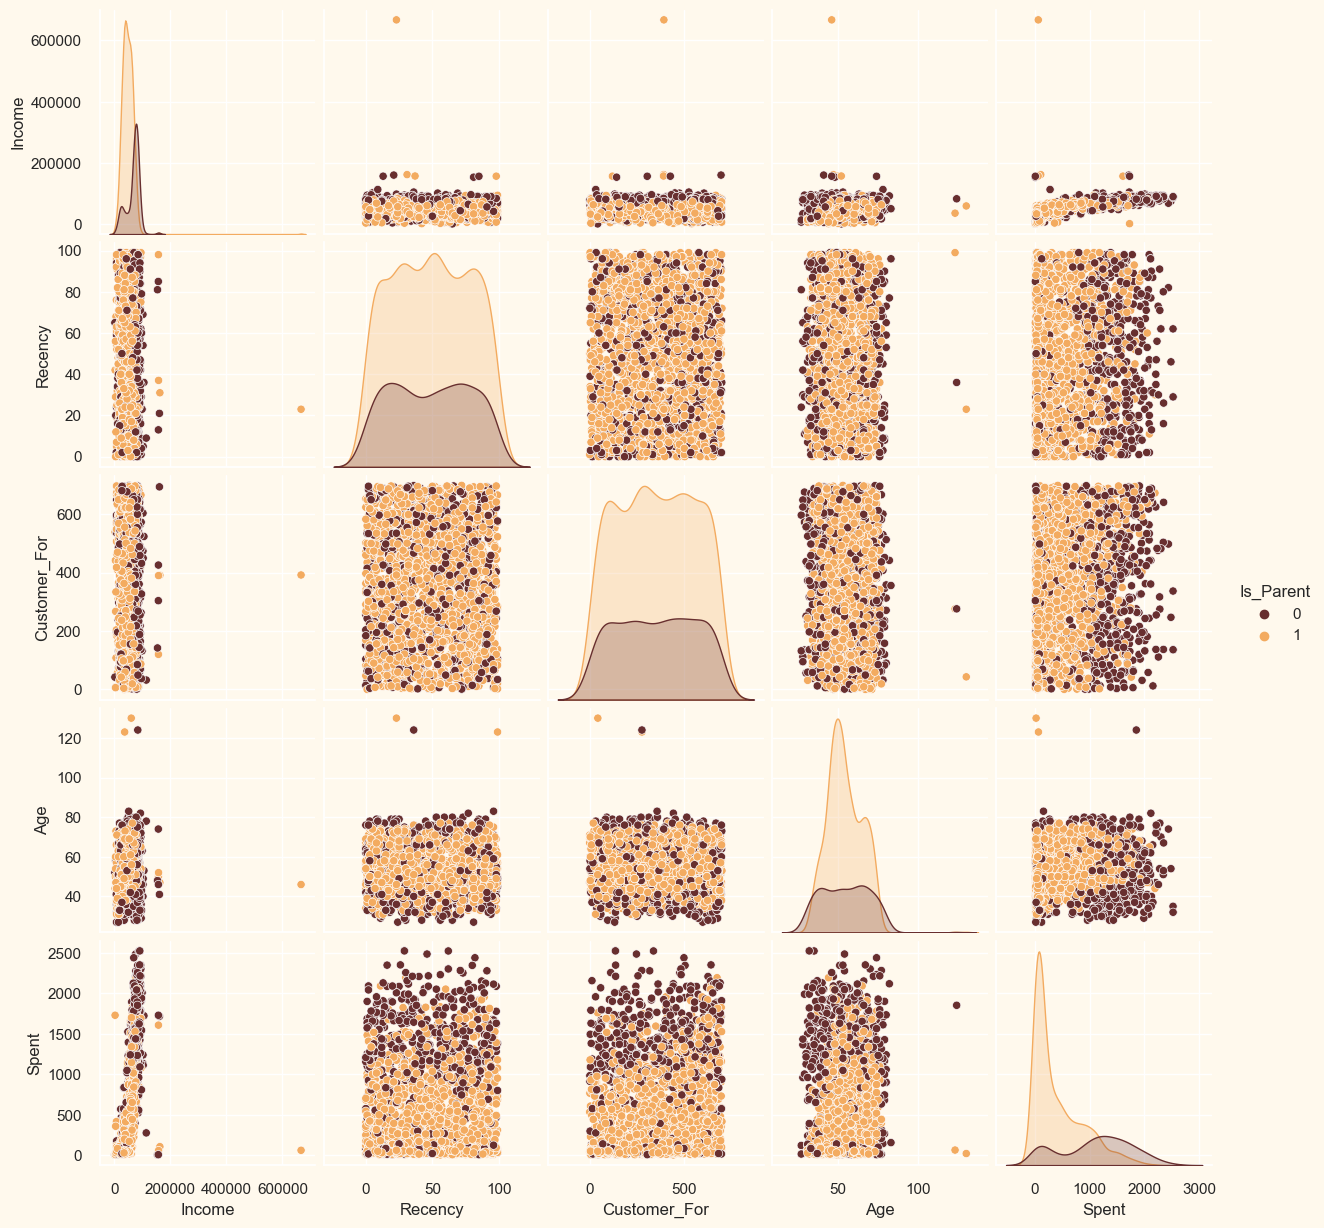

In [24]:
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]

print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(dataframe[To_Plot], hue= "Is_Parent", palette= (["#682F2F","#F3AB60"]))
plt.show()

Clearly, there are a few outliers in the `Income` and `Age` features. I will be deleting the outliers in the data.

In [25]:
dataframe = dataframe[(dataframe["Age"]<90)]
dataframe = dataframe[(dataframe["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(dataframe))

The total number of data-points after removing the outliers are: 2212


Next, let us look at the correlation amongst the features. (Excluding the categorical attributes at this point)

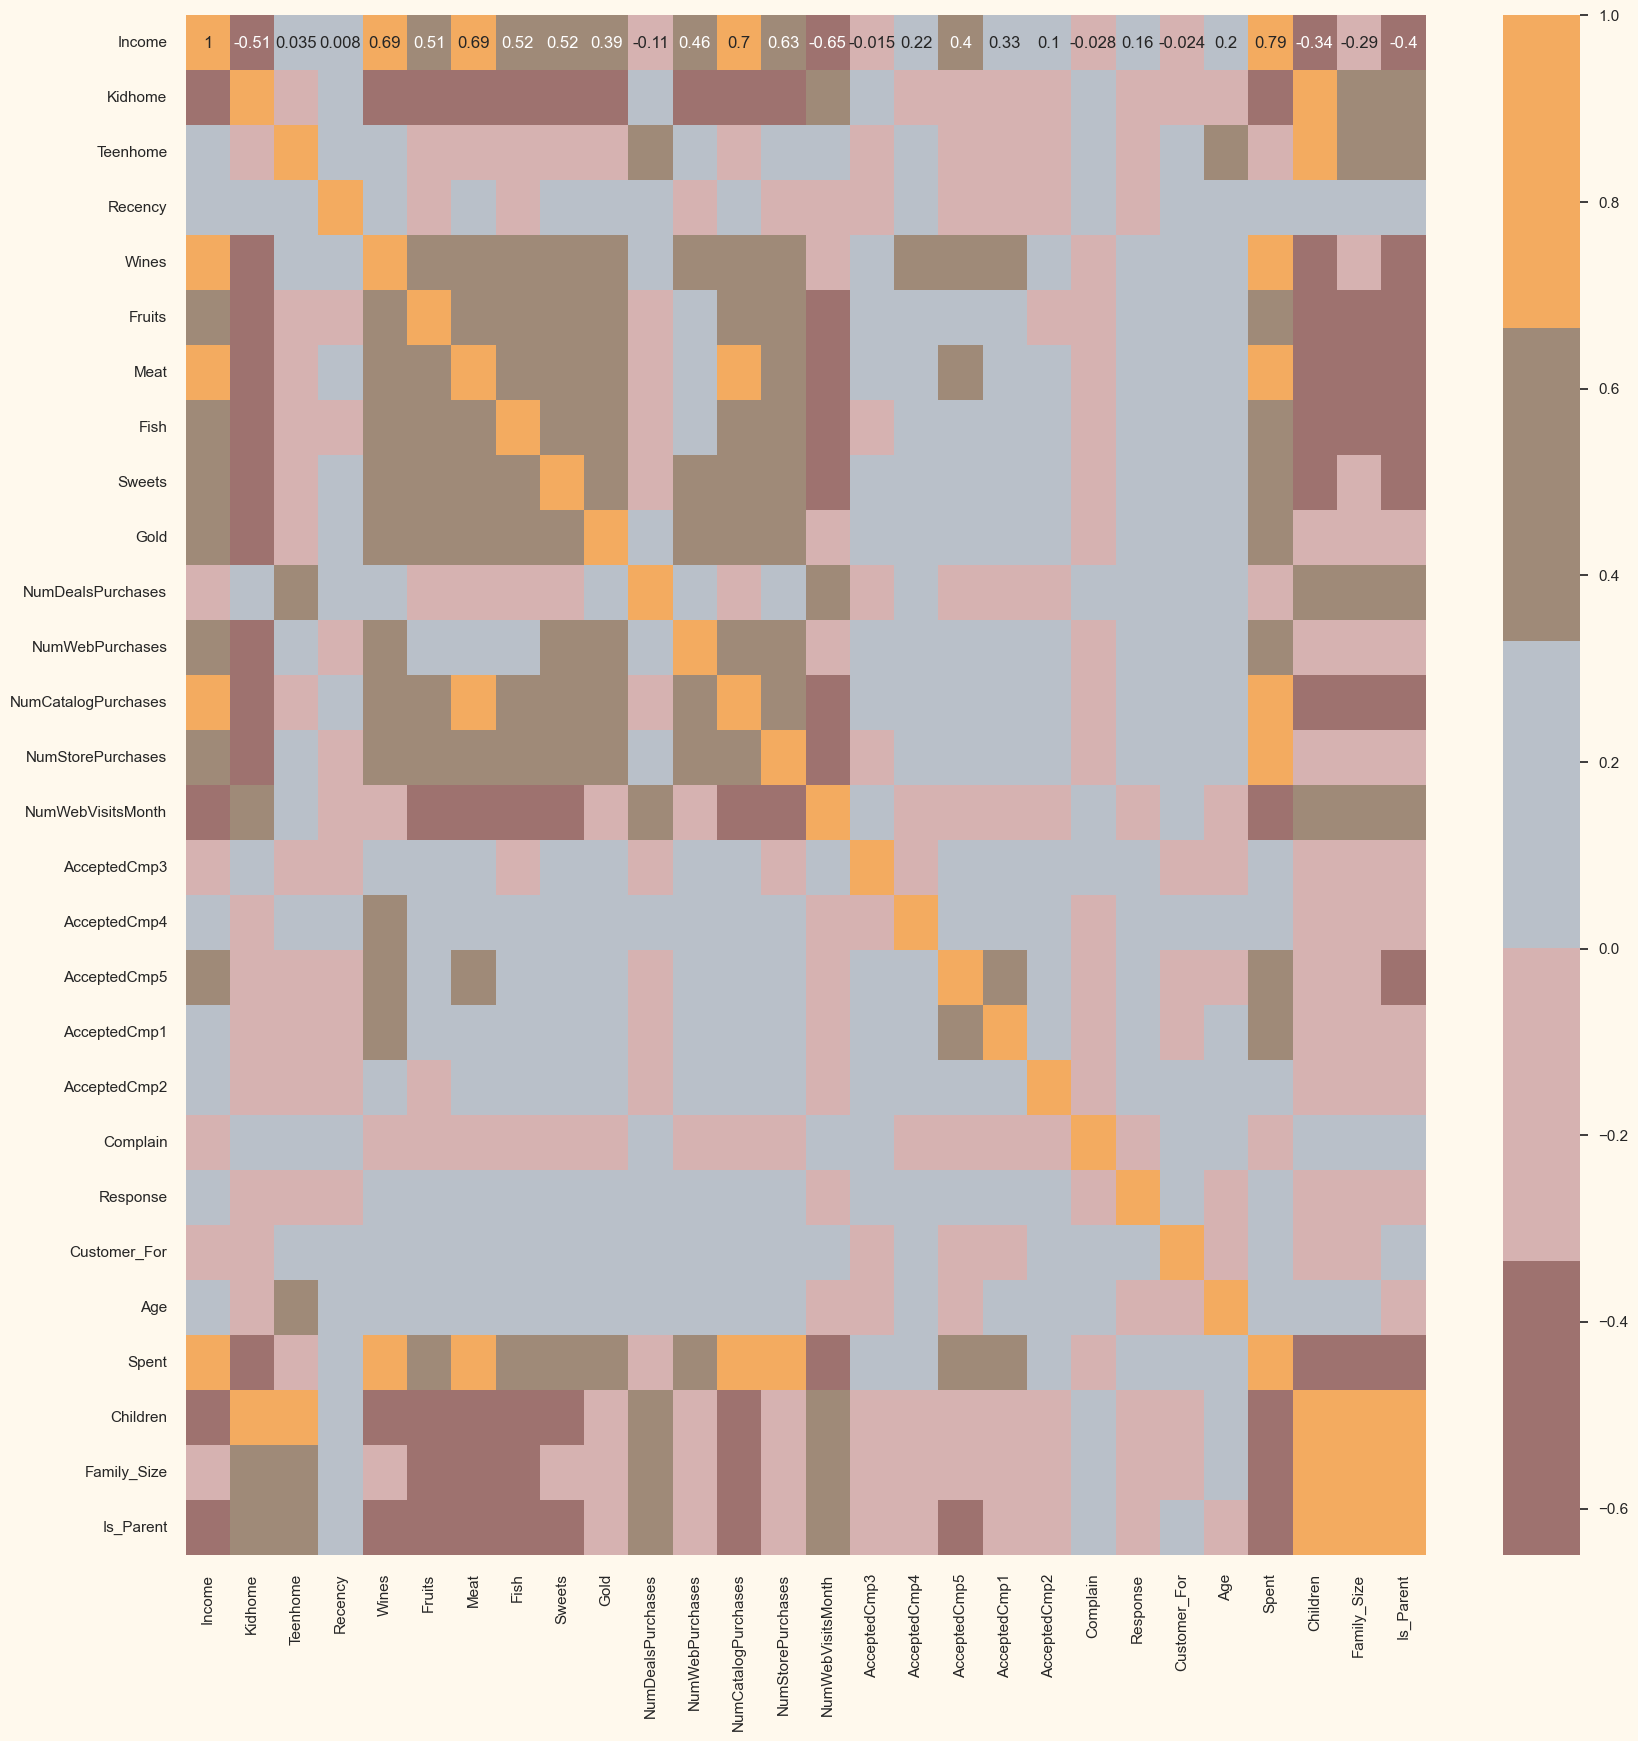

In [26]:
corrmat= dataframe.corr(numeric_only=True)
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)
plt.show()

### Data Processing

In the following steps we are going to process our data. The following data processing will be done:
    
    
1. Label encoding the categorical features
2. Scaling the features using the standard scaler
3. Creating a subset dataframe for dimensionality reduction

In [27]:
s = (dataframe.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [28]:
label_encoder = LabelEncoder()
for i in object_cols:
    dataframe[i] = dataframe[[i]].apply(label_encoder.fit_transform)
print("---- All features are now numerical")

---- All features are now numerical


In [29]:
dataframe_copy = dataframe.copy()

# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
dataframe_copy.drop(columns =cols_del, inplace=True)

#Scaling
scaler = StandardScaler()
scaler.fit(dataframe_copy)
scaled_ds = pd.DataFrame(scaler.transform(dataframe_copy),columns= dataframe_copy.columns )
print("All features are now scaled")

All features are now scaled


We can check the first 5 scaled features in our dataframe as follows.

In [30]:
scaled_ds.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.527721,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.189011,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.206048,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.060584,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.951915,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


### Dimentionality Reduction

In this problem, there are many factors on the basis of which the final classification will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why we will be performing dimensionality reduction on the selected features before putting them through a classifier.

> Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.



**Principal component analysis (PCA)** is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

Steps in this section:

1. Dimensionality reduction with PCA
2. Plotting the reduced dataframe
3. Dimensionality reduction with PCA

We will be reducing the dimensions to 3.

In [31]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)
pca_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
pca_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,1.927331e-17,2.878602,-5.978123,-2.539470,-0.781595,2.386380,7.452915
col2,2212.0,4.497106e-17,1.709469,-4.194757,-1.323932,-0.173716,1.234923,6.168185
col3,2212.0,2.369011e-17,1.231685,-3.625184,-0.853556,-0.051292,0.863841,6.746845


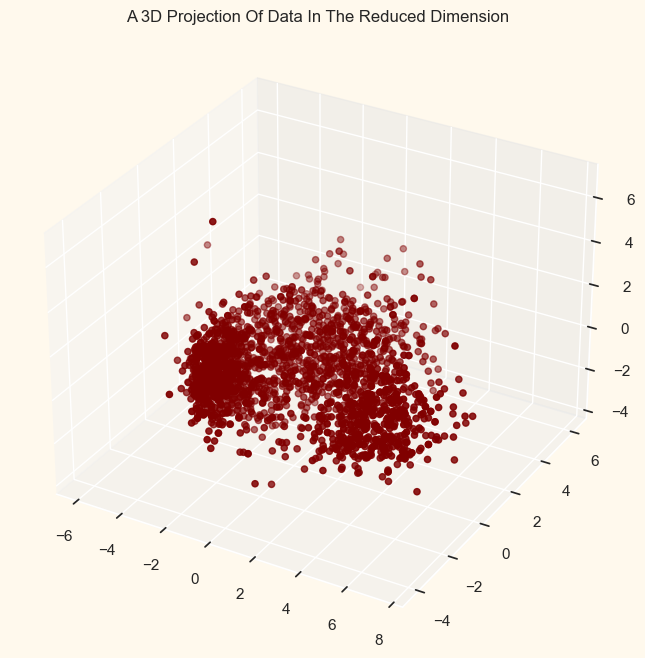

In [32]:
#A 3D Projection Of Data In The Reduced Dimension
x = pca_ds["col1"]
y = pca_ds["col2"]
z = pca_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y ,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Now that we have reduced the attributes to three dimensions, we will be performing clustering via Agglomerative clustering. Agglomerative clustering is a hierarchical clustering method. It involves merging examples until the desired number of clusters is achieved.

Steps involved in the Clustering

1. Elbow Method to determine the number of clusters to be formed
2. Clustering via Agglomerative Clustering
3. Examining the clusters formed via scatter plot

Elbow Method to determine the number of clusters to be formed:


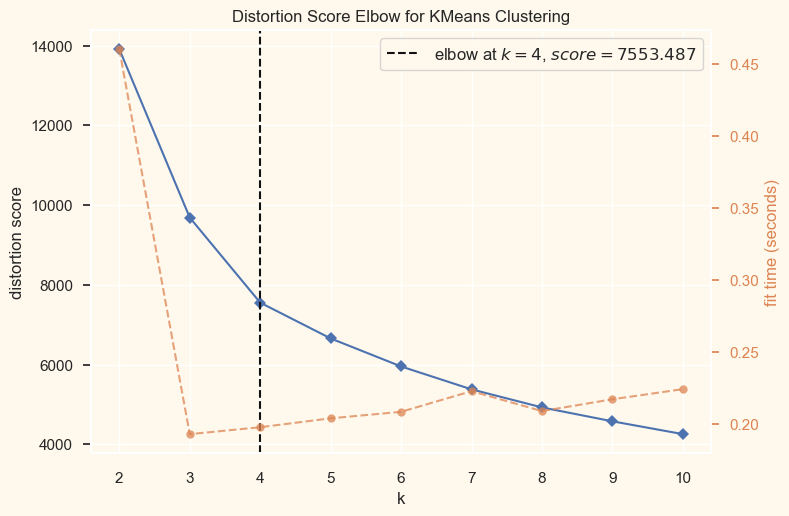

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
print('Elbow Method to determine the number of clusters to be formed:')
elbow_m = KElbowVisualizer(KMeans(), k=10)
elbow_m.fit(pca_ds)
elbow_m.show()

The above cell indicates that four will be an optimal number of clusters for this data. Next, we will be fitting the Agglomerative Clustering Model to get the final clusters.

In [34]:
ac = AgglomerativeClustering(n_clusters=4)
preds = ac.fit_predict(pca_ds)

We can check the first `10` predicted clusters as follows.

In [35]:
preds[:10]

array([2, 3, 2, 1, 3, 0, 0, 1, 1, 3], dtype=int64)

Now we can add the predicted clusters to the original dataframe and to the `pca_ds` as follows:

In [36]:
pca_ds["Clusters"] = preds
dataframe["Clusters"] = preds

In [37]:
pca_ds.head()

,col1,col2,col3,Clusters
0,4.986336,-0.161502,2.445704,2
1,-2.874168,0.022701,-1.530784,3
2,2.615763,-0.731408,-0.264243,2
3,-2.654568,-1.455875,-0.398126,1
4,-0.656015,0.177848,-0.141472,3


In [38]:
dataframe.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Clusters
0,0,58138.0,0,0,58,635,88,546,172,88,...,0,1,663,66,1617,0,0,1,0,2
1,0,46344.0,1,1,38,11,1,6,2,1,...,0,0,113,69,27,0,2,3,1,3
2,0,71613.0,0,0,26,426,49,127,111,21,...,0,0,312,58,776,1,0,2,0,2
3,0,26646.0,1,0,26,11,4,20,10,3,...,0,0,139,39,53,1,1,3,1,1
4,1,58293.0,1,0,94,173,43,118,46,27,...,0,0,161,42,422,1,1,3,1,3


We can examine the clusters formed in `3D` as follows:

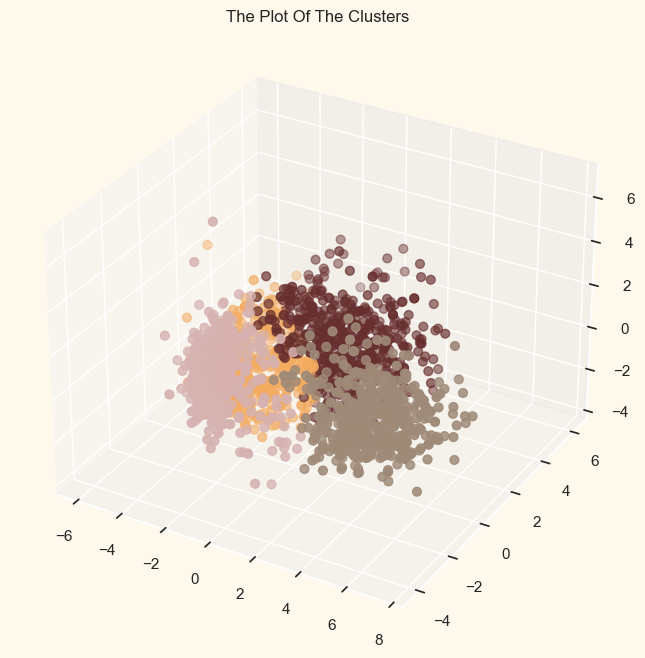

In [40]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=pca_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

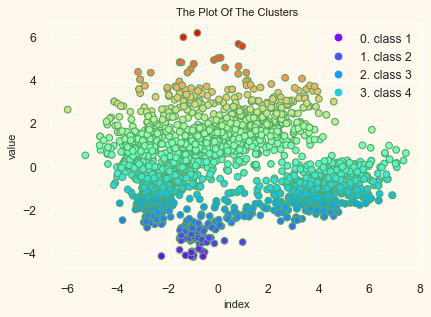

In [45]:
plt.figure(figsize=(6, 4), dpi=80)
scatter = plt.scatter(x, y, c=y, cmap='rainbow', edgecolor="g")
plt.title("The Plot Of The Clusters", color="k", fontsize=10)
plt.xlabel("index", fontsize=10)
plt.ylabel("value", fontsize=10)
plt.legend(handles=scatter.legend_elements()[0], labels=[f"{i}. class {i+1}" for i in range(4)])
plt.show()

### Model Evaluation

Since this is an unsupervised clustering. We do not have a tagged feature to evaluate or score our model. The purpose of this section is to study the patterns in the clusters formed and determine the nature of the clusters' patterns.

For that, we will be having a look at the data in light of clusters via exploratory data analysis and drawing conclusions.

Firstly, let us have a look at the group distribution of clustring.

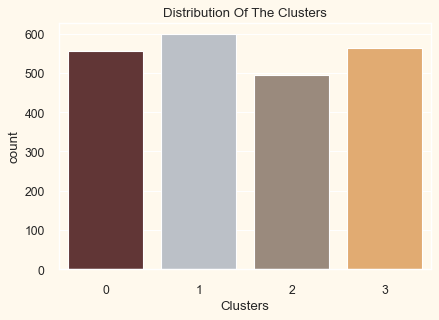

In [47]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
plt.figure(figsize=(6, 4), dpi=80)
pl = sns.countplot(x=dataframe["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

The clusters seem to be fairly distributed.

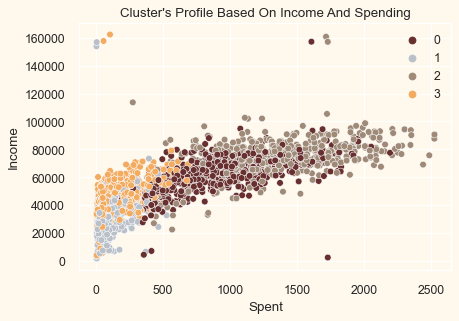

In [49]:
plt.figure(figsize=(6, 4), dpi=80)
pl = sns.scatterplot(data =dataframe, x=dataframe["Spent"], y=dataframe["Income"], hue=dataframe["Clusters"], palette = pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

Income vs spending plot shows the clusters pattern

1. group 0: high spending & average income
2. group 2: high spending & high income
3. group 3: low spending & low income
4. group 1: high spending & low income

Next, I will be looking at the detailed distribution of clusters as per the various products in the data. Namely: Wines, Fruits, Meat, Fish, Sweets and Gold

<Figure size 800x550 with 0 Axes>

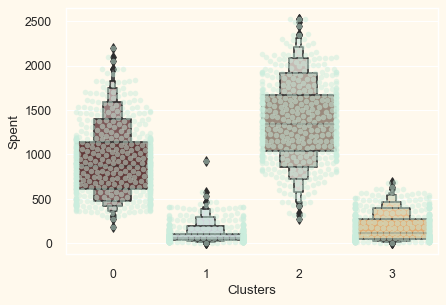

In [50]:
plt.figure()
plt.figure(figsize=(6, 4), dpi=80)
pl = sns.swarmplot(x=dataframe["Clusters"], y=dataframe["Spent"], color= "#CBEDDD", alpha=0.5 )
pl = sns.boxenplot(x=dataframe["Clusters"], y=dataframe["Spent"], palette=pal)
plt.show()


### Refs

0. [www.scikit-yb.org](https://www.scikit-yb.org/en/latest/quickstart.html#using-yellowbrick)
1. [Kaggle](https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering#CLUSTERING)